📂 Please upload the 'credit_score_data.csv' file.


Saving credit_score_data.csv to credit_score_data (1).csv

🔍 First 5 rows of the dataset:
   ID  Age  Income  Loan_Amount  Loan_Duration  Credit_History  \
0   1   18  125724         9392             54               1   
1   2   54  104563        33843             30               0   
2   3   60  102528        41954             14               0   
3   4   28   30879        16072             10               1   
4   5   52   88309         9267             25               1   

   Debt_to_Income  Number_of_Loans  Late_Payments  Credit_Score  
0           45.97               10              4             1  
1           25.05                0             19             2  
2           27.39                0              5             0  
3           44.37                2             19             1  
4           15.14                2              5             0  

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 colu

<ipython-input-12-fe3d700e0459>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Credit_Score"], palette="viridis")


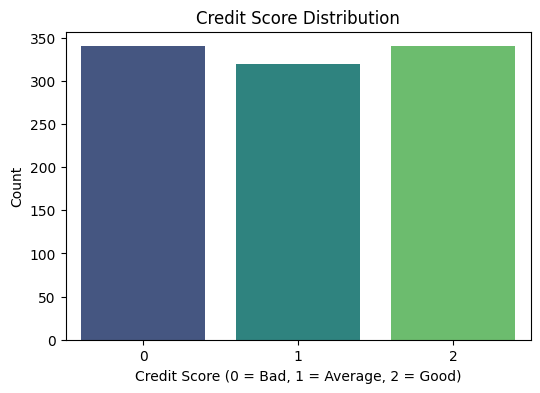

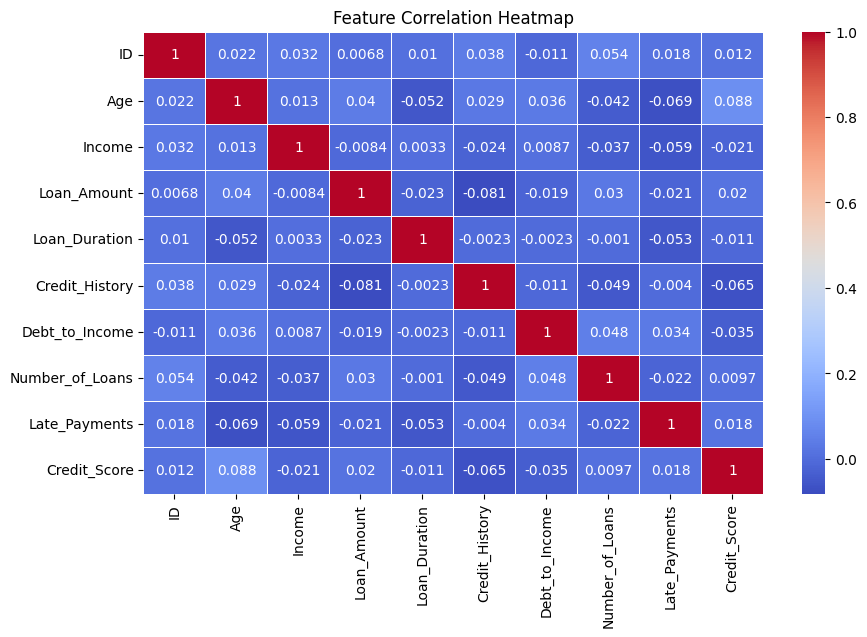

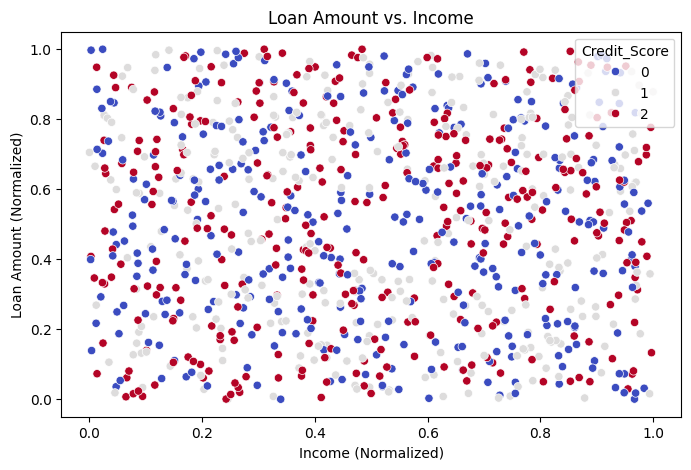


✅ Data is cleaned, transformed, and ready for machine learning models!

📂 Cleaned dataset saved as 'cleaned_credit_score_data.csv'.


In [12]:
# Step 1: Install and Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from google.colab import files

# Step 2: Ask User to Upload CSV File
print("📂 Please upload the 'credit_score_data.csv' file.")
uploaded = files.upload()

# Step 3: Read the uploaded CSV file
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)

# Step 4: Display basic info about the dataset
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

print("\n📊 Dataset Info:")
print(df.info())

print("\n✅ Checking for Missing Values:")
print(df.isnull().sum())

# Step 5: Handle Missing Values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill missing values with median

# Step 6: Normalize Numeric Features (Scaling)
scaler = MinMaxScaler()
num_cols = ["Age", "Income", "Loan_Amount", "Loan_Duration", "Debt_to_Income", "Number_of_Loans", "Late_Payments"]
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 7: Encode Categorical Features
df["Credit_History"] = df["Credit_History"].astype("category").cat.codes
df["Credit_Score"] = df["Credit_Score"].astype("category").cat.codes  # Target variable

# Step 8: Data Visualization

# 🔹 Credit Score Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["Credit_Score"], palette="viridis")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score (0 = Bad, 1 = Average, 2 = Good)")
plt.ylabel("Count")
plt.show()

# 🔹 Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 🔹 Loan Amount vs. Income (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Income"], y=df["Loan_Amount"], hue=df["Credit_Score"], palette="coolwarm")
plt.title("Loan Amount vs. Income")
plt.xlabel("Income (Normalized)")
plt.ylabel("Loan Amount (Normalized)")
plt.show()

# Step 9: Prepare Data for Model Training
X = df.drop(["ID", "Credit_Score"], axis=1)  # Features
y = df["Credit_Score"]  # Target

print("\n✅ Data is cleaned, transformed, and ready for machine learning models!")

# Optional: Save cleaned data
df.to_csv("cleaned_credit_score_data.csv", index=False)
print("\n📂 Cleaned dataset saved as 'cleaned_credit_score_data.csv'.")